**Лабораторная работа №4.**

**Python. Фреймы**

**Цель работы.**

Ознакомление с обработкой исключений. Разработка и исследование фреймовой модели представления знаний.

**ВНИМАНИЕ**, для выполнения лабораторных работ вам **НЕОБХОДИМА** учетная запись Google.


---


# 1. Python. Исключения. Обработка исключений.


---

---

**Исключения**

---

Исключения (exceptions) - ещё один тип данных в python. Исключения необходимы для того, чтобы сообщать программисту об ошибках. Самый простейший пример исключения - деление на ноль:

In [ ]:
100/0

Разберём это сообщение подробнее: интерпретатор нам сообщает о том, что он поймал исключение и напечатал информацию (`Traceback (most recent call last)`).

Далее - имя файла (`File ""`) или ячейка ноутбука Jupyter (если работаем в нем), строка в файле / ячейке с ошибкой (`line 1`);

Далее - Выражение, в котором произошла ошибка (`100 / 0`).

Далее - Название исключения (`ZeroDivisionError`) и краткое описание исключения (`division by zero`).

Частично рассмотрим иерархию встроенных в Python исключений:

* BaseException - базовое исключение (включая системные), от которого берут начало все остальные.
  * SystemExit - исключение, порождаемое функцией sys.exit при выходе из программы.
  * KeyboardInterrupt - порождается при прерывании программы пользователем (обычно сочетанием клавиш Ctrl+C).
  * GeneratorExit - порождается при вызове метода close объекта generator.
  * Exception - здесь заканчиваются полностью системные исключения (которые лучше не трогать) и начинаются обыкновенные, с которыми можно работать.
    * StopIteration - порождается встроенной функцией next, если в итераторе больше нет элементов.
    * ArithmeticError - арифметическая ошибка (FloatingPointError,OverflowError, ZeroDivisionError)
    * AssertionError - выражение в функции assert ложно.
    * AttributeError - объект не имеет данного атрибута (значения или метода).
    * BufferError - операция, связанная с буфером, не может быть выполнена.
    * EOFError - функция наткнулась на конец файла и не смогла прочитать то, что хотела.
    * ImportError - не удалось импортирование модуля или его атрибута.
    * LookupError - некорректный индекс или ключ.
      * IndexError - индекс не входит в диапазон элементов.
      * KeyError - несуществующий ключ (в словаре, множестве или другом объекте).
    * MemoryError - недостаточно памяти.
    * NameError - не найдено переменной с таким именем.
      * UnboundLocalError - сделана ссылка на локальную переменную в функции, но переменная не определена ранее.
    * OSError - ошибка, связанная с системой.
      * BlockingIOError
      * ChildProcessError - неудача при операции с дочерним процессом.
      * ConnectionError - базовый класс для исключений, связанных с подключениями.
    * SyntaxError - синтаксическая ошибка.
    * TypeError - операция применена к объекту несоответствующего типа.
    * ValueError - функция получает аргумент правильного типа, но некорректного значения.
    * Warning - предупреждение.

и всевозможные другие


---

**Обработка исключений**

---

Для обработки исключений используется конструкция `try` - `except`. В блоке `try` мы выполняем инструкцию, которая может породить исключение, а в блоке except мы перехватываем их. При этом перехватываются как само исключение, так и его потомки. Например, перехватывая `ArithmeticError`, мы также перехватываем `FloatingPointError`, `OverflowError` и `ZeroDivisionError`.

In [ ]:
try:
  k = 1 / 0
except ZeroDivisionError:
  k = 0

print(k)

Также возможна инструкция `except` без аргументов, которая перехватывает вообще всё (и прерывание с клавиатуры, и системный выход и т. д.). Поэтому в такой форме инструкция `except` практически не используется, а используется `except Exception`. Однако чаще всего перехватывают исключения по одному типу, для упрощения отладки.

Ещё еще две инструкции, это `finally` и `else`. `finally` выполняет блок инструкций в любом случае, было ли исключение, или нет (применима, когда нужно непременно что-то сделать, к примеру, закрыть файл). Инструкция `else` выполняется в том случае, если исключения не было.

In [ ]:
numbers = [1, 2, 3, 'a']
try:
  for number in numbers:
    print(int(number))
except ValueError as err:
  print(number, ' - это не число.')
  print("ValueError как и другие исключения содержит информацию, которую можно привести в строковом виде (__str__()): ", err)
except Exception:
  print('Возникла проблема, непонятно какая')
else:
  print('Задача выполнена успешно и без ошибок')
finally:
  print('Процесс закончен (может быть, с ошибками (а может, и без))).')

In [ ]:
numbers = [1, 2, 3]
try:
  for number in numbers:
    print(int(number))
except ValueError:
  print(number, ' - это не число.')
except Exception:
  print('Возникла проблема, непонятно какая')
else:
  print('Задача выполнена успешно и без ошибок')
finally:
  print('Процесс закончен (может быть, с ошибками (а может, и без))).')

Также можно самостоятельно вызвать исключение и задать в нем необходимую вам информацию с помощью `raise`.

In [ ]:
raise Exception('ваше', 'исключение')


---


# 2. Фреймы


---

---

**Знакомство с методологией построения и применения фреймовых систем**

---

**Фреймовая модель**, или **модель представления знаний, основанная на фреймовой теории М. Минского**, представляет собой систематизированную в виде единой теории психологическую модель памяти человека и его сознания. Важным моментом в этой теории является понятие **фрейма** – структуры данных для представления некоторого концептуального объекта. Информация, относящаяся к этому фрейму, содержится в **слотах**. Все фреймы взаимосвязаны и образуют единую сеть фреймов. Однако четкого определения связи между фреймами и слотами может и не быть.

Ниже приведен пример фрагмента фреймовой системы, описывающей учебную аудиторию № 000.

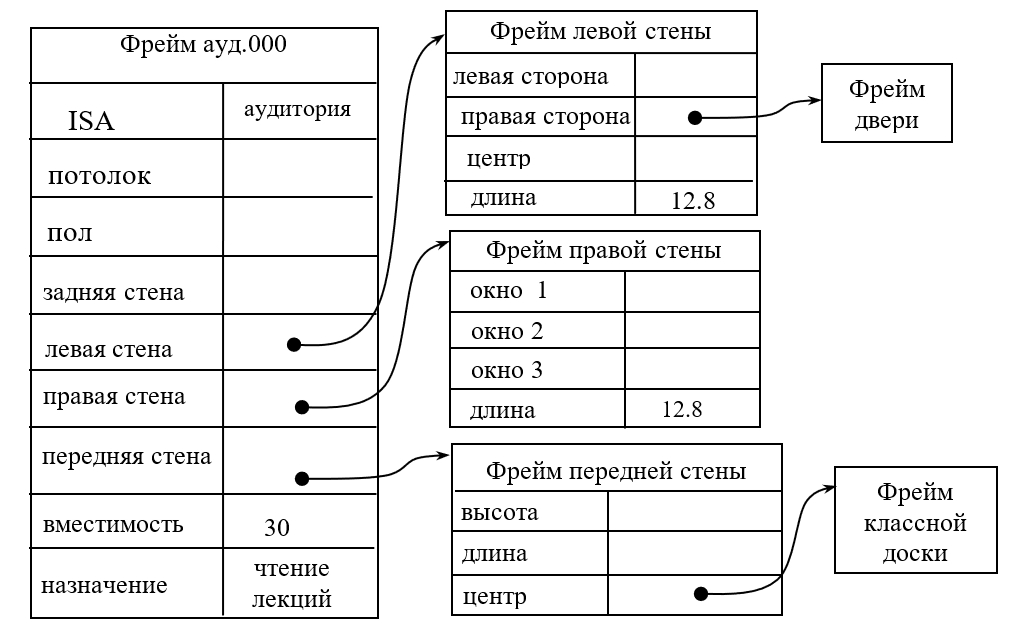

Определение фрейма, данное М. Минским: «**Фрейм** – это единица представления знаний, запомненная в прошлом, детали которой при необходимости могут быть изменены согласно текущей ситуации».

С помощью фреймов описываются не только **статические** ситуации (аудитория), но и **динамические** – празднование дня рождения, подготовка ко дню рождения. Каждый фрейм можно рассматривать как сеть, состоящую из нескольких вершин и отношений. Ниже представлен **динамический фрейм**, описывающий прокол надутого предмета.


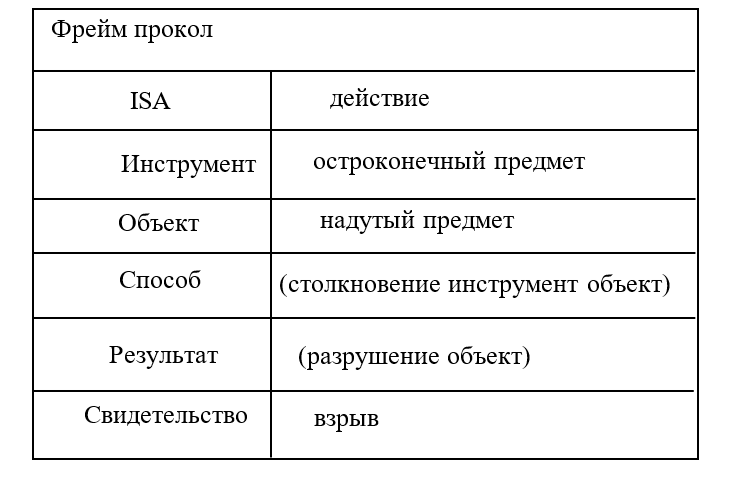

Значениями слота могут являться **процедуры**, параметрами которых являются значения слотов этого же фрейма. **Процедуры оформляются в виде списка и заключаются в круглые скобки**. Первый элемент такого списка является **именем процедуры**, остальные элементы – **аргументы процедуры**.

Иерархическая структура сети фреймов построена на отношениях **«род–вид»** и **«часть–целое»**.

Отношения **«род–вид»** характерны тем, что на верхних уровнях расположены **абстрактные** объекты (**концепты**), а на нижних уровнях – **конкретные** объекты. Причем объекты нижних уровней наследуют значения атрибутов объектов верхних уровней.  Эти отношения еще называют **отношениями типа ISA**. Такое название объясняется формой записи «ПРОКОЛ» is a «действие».

Отношение **«часть–целое»** касается **структурированных** объектов и показывает, что объект нижнего уровня является **частью** объекта верхнего уровня. Например, стена является структурным элементом аудитории.

Рассмотрим более подробно структуру данных фрейма.

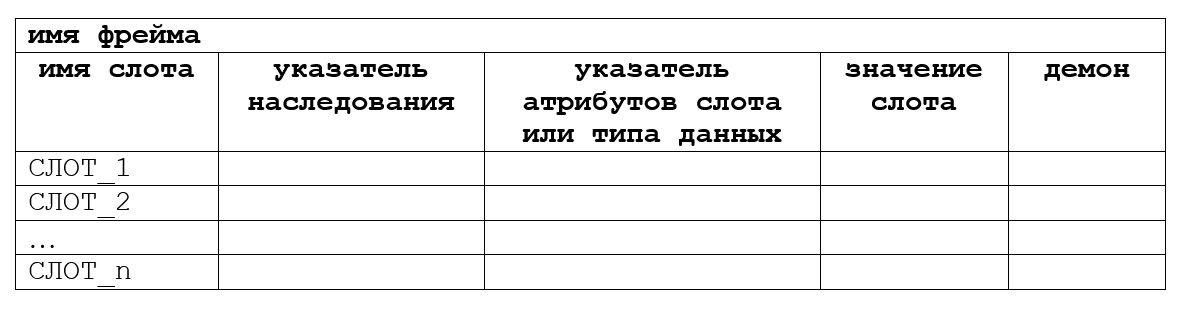

1. **Имя фрейма** – идентификатор, присваиваемый фрейму. Имя должно быть уникальным.

2. **Имя слота** – это идентификатор, присваиваемый слоту; слот должен иметь уникальное имя во фрейме, к которому он принадлежит. Обычно имя слота не несет никакой смысловой нагрузки, но в некоторых случаях оно может иметь специфический смысл. В языке FRL (язык разработки фреймовых моделей, Frame Representation Language) к таким именам помимо ISA относятся:
      * **DESCENDANTS** – указатель прямого дочернего файла;
      * **DEFINEDBY** – имя пользователя, определяющего фрейм;
      * **DEFINEDON** – дата определения фрейма;
      * **MODIFIEDON** – дата модификации фрейма;
      * **COMMENT** – комментарий.

  Эти слоты называются системными и используются при редактировании базы знаний и управлении выводом.

3. **Указатели наследования**. Эти указатели касаются только фреймовых систем иерархического типа, основанных на «родо-видовых» отношениях. Указатели наследования показывают, какую информацию об атрибутах слотов во фрейме верхнего уровня наследуют слоты с такими же именами во фрейме нижнего уровня. Типичные указатели наследования:
      * **Unique**  **U**: уникальный – показывает, что каждый фрейм может иметь слоты с различными значениями;;
      * **Same**  **S**: такой же – показывает, что все слоты должны иметь одинаковые значения;
      * **Range**  **R**: установка границ – значения слотов фрейма нижнего уровня должны находиться в пределах, указанных значениями слотов фреймов нижнего уровня;
      * **Override**  **O**: игнорировать – при отсутствии указания значение слота фрейма верхнего уровня становится значением слота фрейма нижнего уровня, но если определенно новое значение, то значение слотов фреймов нижних уровней принимается в качестве окончательных значений слотов. Указатель  O выполняет функции указателей U и S.
4. **Указатели типа данных**. Здесь показывается, что слот имеет численное значение, либо служит указателем другого фрейма. К типам данных относятся, например,
  * **FRAME** (указатель)
  * **INTEGER** (целое)
  * **REAL** (действительное)
  * **BOOL** (булево)
  * **LISP** (процедура)
  * **TEXT** (текст)
  * **LIST** (список)
  * **TABLE** (таблица)
  * **EXPRESSION** (выражение)  

5. **Значение слота**. Без комментариев. Единственное, что надо отметить. Значение слота должно совпадать с указанным типом данных этого слота, кроме того, должно выполняться условие наследования.

6. **Демон**. В языке FRL определены три типа демонов: **IF-NEEDED**, **IF-ADDED**, **IF-REMOVED**. Демоном называется процедура, автоматически запускаемая при выполнении некоторого условия.  Демоны запускаются при обращении к соответствующему слоту. Демон **IF-NEEDED** запускается, если в момент обращения к слоту его значение не было установлено, **IF-ADDED** запускается при подстановке в слот значения, **IF-REMOVED** запускается при стирании значения слота. Демон является разновидностью присоединенной процедуры.

7. **Присоединенная процедура**. В качестве значения слота можно использовать программу процедурного типа, называемую служебной. Присоединенная процедура запускается по сообщению, переданному из другого фрейма. Важно отметить, что во фреймовых языках представления знаний отсутствует специальный механизм управления выводом, поэтому пользователь должен реализовать данный механизм с помощью присоединенной процедуры.


Разделение средств представления знаний и средств вывода во фреймовых системах достаточно затруднительно и носит условный характер.

Во фреймовых системах можно выделить три способа управления выводом:  два – с  помощью присоединительных процедур – демона и служебной процедуры, и один – с помощью механизма наследования.

С помощью механизма управления наследованием, базирующегося на отношениях «род-вид» или ISA-отношениях, осуществляется автоматический поиск и определение значений слотов фрейма верхнего уровня и присоединенных процедур служебного типа. С помощью механизма наследования экономится память и сокращается объем работ при программировании. Посредством объединения демона и служебной процедуры можно рационально реализовать любой механизм управления выводом. Однако для согласованного и правильного функционирования системы в целом необходимо ее тщательное проектирование. Здесь необходимо решить проблему зацикливания, которая связана с возможностью авторекурсивного определения фреймов, т.е. с возможностью ссылок фреймов на себя непосредственно или через другие фреймы. Например, демон IF-ADDED в слоте «А» может добавить значение в слот «В», который в свою очередь, добавит значение в «А». Процесс зацикливается.

Для борьбы с зацикливанием в FRL используется комментарий, описывающий источник информации. Доступ к комментарию возможен из любых процедурных средств. Еще одним решением проблемы зацикливания является ограничение на глубину входа в цикл и на общую глубину распространения.

Рассмотрим несколько простых примеров иерархических систем планирования. Эти системы базируются на отношениях ISA между фреймами. Первый пример – описание семинара (совещания) в большой компании или фирме.

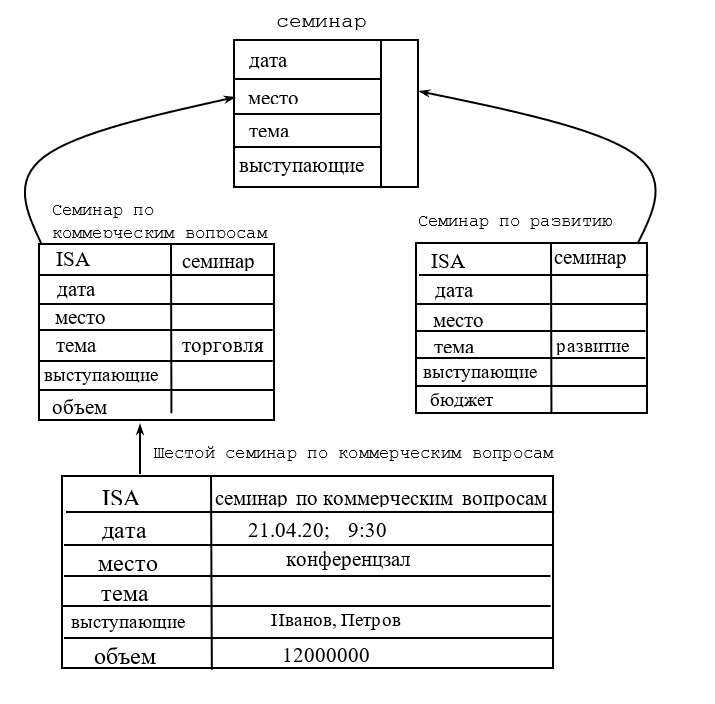

На самом верхнем уровне иерархии определен фрейм "*семинар*", содержащий четыре слота. В нашем случае семинары разделяются на семинары по коммерческим вопросам и семинары по развитию. Эти фреймы определены в качестве соответствующих дочерних фреймов.  Далее, общей темой семинаров по коммерческим вопросам является торговля, а общей темой семинаров по развитию является освоение новых видов продукции, которые подставляются в качестве значений в соответствующие слоты. Кроме того, во фрейме "*семинар по коммерческим вопросам*" задается бюджет на освоение. В нашем примере в качестве фрейма, дочернего по отношению к фрейму "*семинар по коммерческим вопросам*" определен фрейм "*шестой семинар по коммерческим вопросам*", в четыре слота которого введены конкретные значения. Исключение составляет слот "*тема*". Что касается слота "*тема*", то здесь в момент обращения к слоту "*тема*" фрейма "*шестой семинар по коммерческим вопросам*" запускается механизм управления наследованием, с помощью которого осуществляется поиск и подстановка значения этого слота в соответствующем фрейме. Причем поиск ведется и во фреймах верхнего уровня.

Рассмотрим подробнее структуру фрейма "*шестой семинар по коммерческим вопросам*".


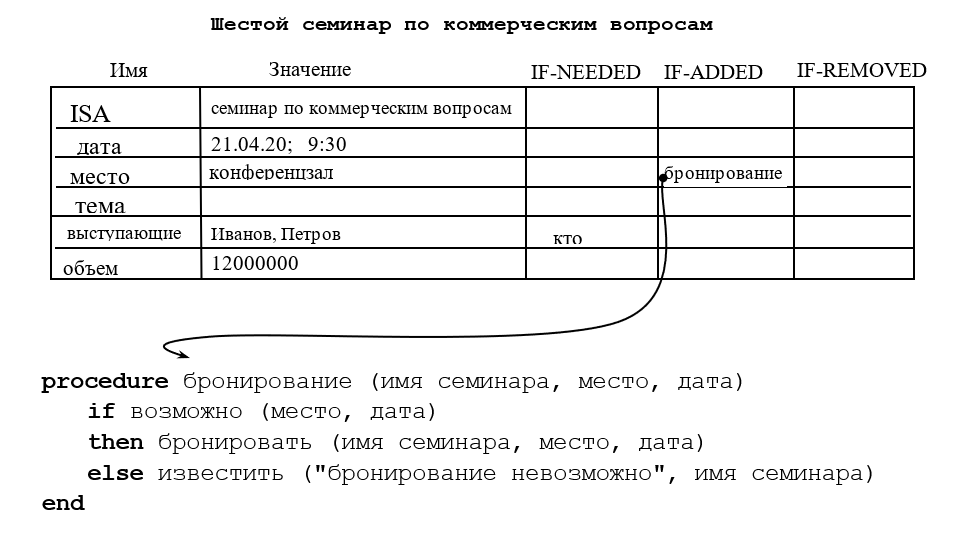

В нашем случае в каждом слоте можно указать три типа демонов. В общих чертах демон функционирует следующим образом. В данном примере в слоте "место" определен демон IF-ADDED с именем "бронирование", который автоматически запускается при подстановке в этот слот значения, в нашем случае "конференцзал". Если этот зал можно занять, то он бронируется, в противном случае, когда зал уже занят, выдается сообщение "бронирование невозможно". Демон IF-NEEDED с именем "кто", присоединенный к слоту "выступающие", в случае, если при обращении к данному слоту его значение не было определено, генерирует запрос: "Кто выступает на шестом семинаре по коммерческим вопросам?". Ответ на этот вопрос передается при подстановке входных данных пользователя в качестве значения слота.

Рассмотрев работу демонов, перейдем к рассмотрению работы служебной процедуры на примере, приводимом ниже.


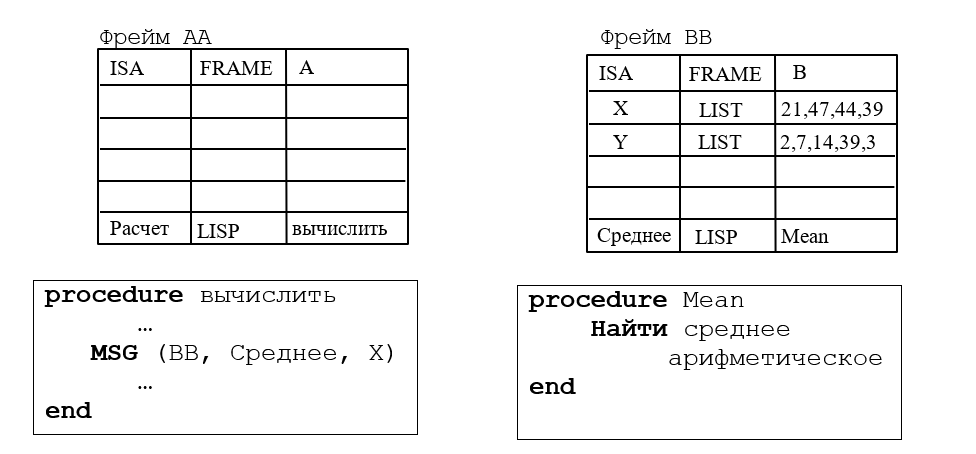

Команда `MSG`, имеющаяся в присоединенной процедуре с именем "вычислить", относящаяся к слоту "расчет"  фрейма "АА", служит для передачи сообщений. Структура предложения этой команды выглядит следующим образом:

`MSG(имя фрейма, имя слота, параметр)`

Механизм передачи/приема сообщений с помощью команды MSG действует следующим образом. Если по сообщению от другого фрейма инициируется присоединенная процедура "вычислить" фрейма "АА", то с помощью команды MSG фрейму "ВВ" передается сообщение, по которому инициируется присоединенная процедура Mean слота "среднее" фрейма "ВВ". С помощью той процедуры вычисляется среднее арифметическое четырех значений 21, 47, 44, 39 слота "X". Результат вычисления "37,75" передается во фрейм "АА".


Основной цикл вывода во фреймовой системе состоит из следующих шагов:
1. пользователь или внешняя система, использующая систему фреймов в качестве представления своих знаний, создает экземпляр некоторого общего фрейма;
2. если пользователь, внешняя система или присоединенная процедура обращаются к слоту на предмет считывания, то выполняются следующие действия:
  *	если в слоте хранится значение, то возвращается это значение;
  *	в противном случае запускается демон IF-NEEDED, вычисляя значение слота, и, возможно, вызывая заполнение других слотов или создание экземпляров новых фреймов;
3. при записи в слот, если этот слот содержит демон IF-ADDED, запускается этот демон, что может привести к заполнению новых слотов или созданию новых фреймов.


---

**Пример представления и решения задачи из планиметрии треугольника**

---

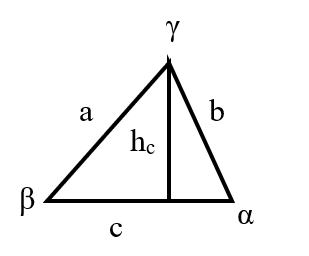

Пусть необходимо решать задачи из планиметрии треугольника, вычисляя одни параметры через другие. Причём исходными данными являются не формулы, а заранее заданные математические отношения ($R_i$), поскольку до формулировки задачи не известно, что является исходными данными и что должно быть результатом.


\begin{array}{|c|c|}
\hline & Математические \; отношения \\ \hline
\mathrm{R}_1 & \alpha + \beta + \gamma - \pi = 0 \\ \hline
\mathrm{R}_2 & (a / \sin \alpha) - (b / \sin \beta) \\ \hline
\mathrm{R}_3 & h_c - b \cdot (\sin \alpha) = 0 \\ \hline
\mathrm{R}_4 & c \cdot (\sin \gamma) - b \cdot (\sin \beta) = 0 \\ \hline
\mathrm{R}_5 & a + b + c - p = 0 \\ \hline
\mathrm{R}_6 & (c \cdot h_c) / 2 - S = 0 \\ \hline
\mathrm{R}_7 & \sqrt{\frac{p}{2}\cdot(\frac{p}{2}-a)\cdot(\frac{p}{2}-b)\cdot(\frac{p}{2}-c)} - S = 0 \\ \hline
\end{array}


Сформулируем модель предметной области – планиметрия треугольника – на основе фреймов, создав N фреймов-прототипов.
Опишем ниже основные функции лабораторного языка фреймового типа (ЛЯФ), реализованного на языке Python.

FCREATING – создание фрейма

Фрейм «Математические отношения» помогает понять взаимодействие друг с другом параметров предметной области:


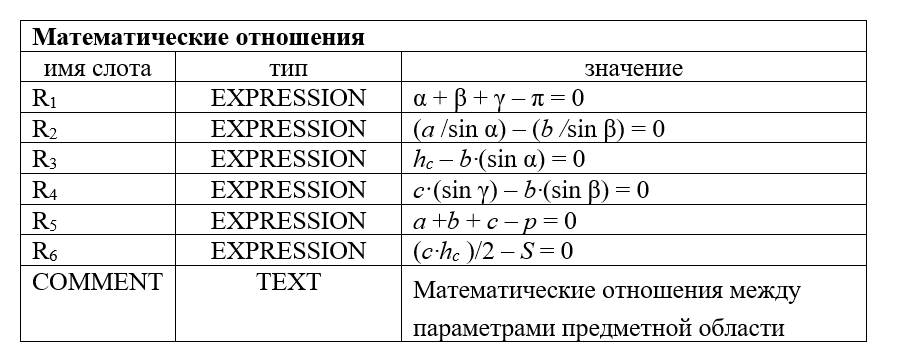

Пример:

FCREATING (Математические отношения

(R1, EXPRESSION, (α + β + γ – π = 0)),

(R2, EXPRESSION, ((a /sin α) – (b /sin β) = 0)),

……

(COMMENT, TEXT, (Математические отношения между параметрами предметной области)),

)


FPUT(F, Y, Z) – добавление информации во фрейм, где F – имя фрейма, Y – имя слота, Z – значение.

Пример:

FPUT(Треугольник, α, 0.5)

FPUT(Треугольник, β, 0.25)

FPUT(Треугольник, c, 1.23)


FGET(F, S)– извлечение информации из фрейма, где F– имя фрейма, S – имя слота.

Пример:

FGET(Треугольник, α)

FGET(Треугольник, c)

Пусть пользователю необходимо решить задачу:

  **«Найти площадь треугольника $S$ по известной стороне $c$ и известным прилегающим углам $α$ и $β$».**

Ниже приведены этапы решения задачи.
Фрейм «Треугольник» является основным в решении задачи «планиметрия треугольника»


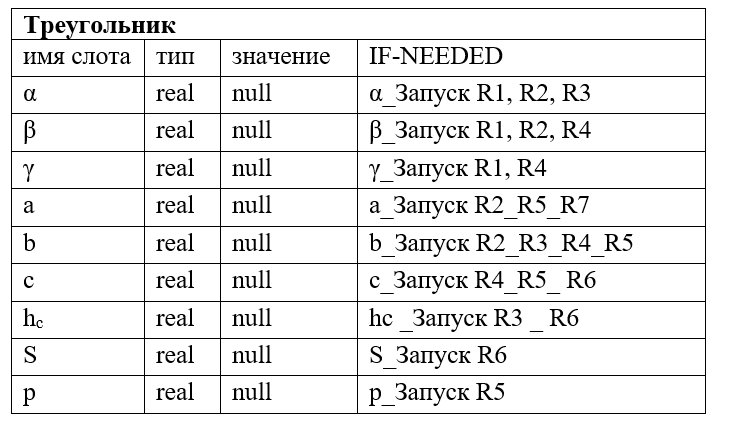

Ниже приведена программная реализация указанных фреймов.

In [ ]:
import numpy as np
import sympy
from sympy.solvers import solve
from sympy import symbols, Eq, sin, sqrt
from functools import partial

def msg(frame, slot_name, **kwargs):
  print("msg", frame.frame_name, str(slot_name))
  return fget(frame, slot_name, **kwargs)

def fget(frame, slot_name, **kwargs):
  print("fget", frame.frame_name, str(slot_name))
  if frame.slots[slot_name].if_needed is not None:
    return frame.slots[slot_name].if_needed(**kwargs)
  else:
    return frame.slots[slot_name].value

def fput(frame, slot_name, value, **kwargs):
  print("fput", frame.frame_name, str(slot_name), str(value))
  frame.slots[slot_name].value = value
  if frame.slots[slot_name].if_added is not None:
    return frame.slots[slot_name].if_added(frame, **kwargs)

def fdelete(frame, slot_name):
  print("fdelete", frame.frame_name, str(slot_name))
  frame.slots[slot_name].value = None
  if frame.slots[slot_name].if_removed is not None:
    return frame.slots[slot_name].if_removed(frame)

class Slot():
  def __init__(self, slot_name, if_needed=None, if_added=None, if_removed=None):
    self.name = slot_name
    self.value = None
    self.if_needed = if_needed
    self.if_added = if_added
    self.if_removed = if_removed

class Frame():
  def __init__(self, frame_name, parent=None):
    self.frame_name = frame_name
    self.slots = {}

alpha, beta, gamma, pi, S, p, h_c, a, b, c = symbols('alpha beta gamma pi S p h_c a b c')

global math_expressions_frame, triangle_frame

math_expressions_frame = Frame("Математические выражения")
triangle_frame = Frame("Треугольник")


def evaluate_math_expr(**kwargs):
  target_variable = kwargs['target_variable']
  known_values = kwargs['known_values']
  math_exression = kwargs['value']
  known_values[pi] = np.pi
  result = solve(math_exression.subs(known_values), target_variable)
  if len(result) == 0 or type(result[0]) is not sympy.core.numbers.Float:
    return None
  else:
    return result[0]

slot = Slot('R1', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R1', Eq(alpha + beta + gamma - pi, 0))

slot = Slot('R2', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R2', Eq(a / sin(alpha) - b / sin(beta), 0))

slot = Slot('R3', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R3', Eq(h_c - b * sin(alpha), 0))

slot = Slot('R4', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R4', Eq(c * sin(gamma) - b * sin(beta), 0))

slot = Slot('R5', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R5', Eq(a + b + c - p, 0))

slot = Slot('R6', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R6', Eq((c * h_c) / 2 - S, 0))

slot = Slot('R7', if_needed = evaluate_math_expr)
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, 'R7', Eq(sqrt(p / 2 * (p / 2 - a) * (p / 2 - b)* (p / 2 - c)) - S, 0))

slot = Slot("COMMENT")
math_expressions_frame.slots[slot.name] = slot
fput(math_expressions_frame, "COMMENT", "Математические отношения между параметрами предметной области")


slot = Slot("Возможность цикличного обновления")
triangle_frame.slots[slot.name] = slot
fput(triangle_frame, "Возможность цикличного обновления", False)

def triangle_reupdate(frame, **kwargs):
  #if (kwargs['level']==1): return
  triangle_frame.slots["Возможность цикличного обновления"].value = True
  print("Цикличное обновление значений слотов")
  while triangle_frame.slots["Возможность цикличного обновления"].value == True:
    changed = False
    for key, slot in triangle_frame.slots.items():
      known_values = {}
      for key2, slot2 in triangle_frame.slots.items():
        known_values[key2] = slot2.value
      value = fget(triangle_frame, key, target_variable=key, known_values=known_values)
      if (value != slot.value and value is not None):
        print("Cлот", key, "изменился", str(value))
        changed = True
        slot.value = value
    if changed == False:
      print("Дальнейшее цикличное обновление невозможно")
      triangle_frame.slots["Возможность цикличного обновления"].value = False

def if_needed(**kwargs):
  target = kwargs['target']
  possible_rules = kwargs['possible_rules']
  known_values = {}
  for key, slot in triangle_frame.slots.items():
    if slot.value is not None:
      known_values[key] = slot.value
  result = None
  for R in possible_rules:
    result = msg(math_expressions_frame, R, value=math_expressions_frame.slots[R].value, target_variable=target, known_values=known_values)
    if result is not None:
      fput(triangle_frame, target, result, level=1)
      print("Cлот", target, "изменился", str(result))
      break

slot = Slot(alpha, if_needed = partial(if_needed, target=alpha, possible_rules=['R1', 'R2', 'R3']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(beta, if_needed = partial(if_needed, target=beta, possible_rules=['R1', 'R2', 'R4']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(gamma, if_needed = partial(if_needed, target=gamma, possible_rules=['R1', 'R4']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(a, if_needed = partial(if_needed, target=a, possible_rules=['R2', 'R5', 'R7']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(b, if_needed = partial(if_needed, target=b, possible_rules=['R2', 'R3', 'R4', 'R5']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(c, if_needed = partial(if_needed, target=c, possible_rules=['R4', 'R5', 'R6']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(h_c, if_needed = partial(if_needed, target=h_c, possible_rules=['R3', 'R6']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(S, if_needed = partial(if_needed, target=S, possible_rules=['R6']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot(p, if_needed = partial(if_needed, target=p, possible_rules=['R5']), if_added = partial(triangle_reupdate, level=0))
triangle_frame.slots[slot.name] = slot
slot = Slot("Возможность цикличного обновления")
triangle_frame.slots["Возможность цикличного обновления"] = slot


fput(triangle_frame, alpha, 0.5)
fput(triangle_frame, beta, 0.25)
fput(triangle_frame, c, 1.23)

print(triangle_frame.slots[S].value)

---


# 3. Задания


---

**Задание 1.** Выполнить несколько запусков фреймовой модели с разными входными параметрами: с корректно заданными исходными данными (входные переменные и целевая переменные, отличные от приведенных в примере), с недостаточным количеством исходных данных.

**Задание 2.** Напишите функцию обработки (парсинга) строки (адреса клиента, формата - Страна, Область, Город, Дом, Квартира) для извлечения из неё составной информации, с использованием исключений и их обработкой

**Задание 3.** Выберите предметную область, опишите её с помощью фреймовой модели (как минимум, два фрейма, с указанием необходимых демонов и приведением псевдокода (наподобие фрейма "*шестой семинар по коммерческим вопросам*" и других примеров в лабораторной работе)). Для построения диаграмм-фреймов можно воспользоваться сервисом - https://app.diagrams.net/.

**Задание 4.** (необязательно) Выберите предметную область, опишите её с помощью фреймовой модели программно, протестируйте

---


# 4. Выполнение работы


---

1. Изучить теоретический и практический материал лабораторной работы.
2. Выполнить, задания 1, 2 и 3 из раздела 3.
3. Оформить отчёт о выполненной работе.


---


# 5. Отчет


---
Оформить отчёт со следующим содержанием:
* Титульный лист.
* Введение (цель работы, постановка задачи).
* Ход выполнения заданий и описание результатов.
Приведите решение задач в виде кода, скриншоты результатов тестирования.
* Заключение (выводы).

Отчет должен быть оформлен согласно требованиям ОС ТУСУР (https://regulations.tusur.ru/documents/70).